# Desafio:

A partir dos 3 DataFrames abaixo referentes a valorização e desvalorização de um conjunto de ativos financeiros:

* Calcular o preço da carteira
* Representar graficamente o comportamento dos ativos
* Montar uma estratégia de compra e venda que:
    1. Identifique os momentos ideais de venda
    1. Identifique os momentos ideais de compra
* A partir da estratégia de compra e venda, representar graficamente o comportamento da carteira


# Imports

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import datetime as dt

%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format

# Funções

In [99]:
def gera_grafico(ativo, titulo, ma20 = None, ma100 = None, buys = None, sells = None):
    """
      Gera um gráfico de linha do ativo, suas médias móveis e indicações de compra e venda
      Argumentos:
        ativo: o conjunto dos dados
        title: título do gráfico
      Argumentos opcionais:
        ma20: médias móveis de 20 dias
        ma100: médias móveis de 100 dias
        buys: momentos de indicações de compra
        sells: momentos de indicações de venda
      Retorna:
        Uma imagem do gráfico gerado.
    """
    
    fig = plt.figure(figsize = (20,8))
    ax1 = fig.add_subplot(111)

    ax1.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth = [1, 4, 7, 10]))
    ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%b - %Y"))

    lines = plt.plot(asset_pricing['DATA'], ativo)
    
    if ma20 is not None:
        lines = plt.plot(asset_pricing['DATA'], ma20)
    
    if ma100 is not None:
        lines = plt.plot(asset_pricing['DATA'], ma100)
        
    if buys is not None:    
        plt.plot(buys['DATA'], buys['preco'], '^',
                 markersize=14, color='g', label = 'Compra')
        
    if sells is not None:
        plt.plot(sells['DATA'], sells['preco'], 'v',
                 markersize=14, color='r', label = 'Venda')

    ax1 = plt.title(titulo, fontsize = 22)
    ax1 = plt.xlabel("Data", fontsize = 18)
    ax1 = plt.ylabel("Preço", fontsize = 18)
    
    plt.legend()
    
    plt.show()   

# Dados

In [100]:
portfolio = pd.read_csv('AtivoCarteira.csv')
portfolio

,ativos,qtd
0,A,15
1,C,38
2,E,101


In [101]:
asset_prices = pd.read_csv('AtivoPrecoUnidade2017-04-05.csv')
asset_prices

,ativo,preco_unidade
0,A,14
1,B,32
2,C,12
3,D,13
4,E,31


In [102]:
asset_pricing = pd.read_csv('AtivoValorizacaoDiaria.csv')
asset_pricing['DATA'] = pd.to_datetime(asset_pricing['DATA'], format='%Y-%m-%d')
asset_pricing.head()

,DATA,A,B,C,D,E
0,2017-04-05,0.00281,-0.01801,0.03206,0.03082,0.04895
1,2017-04-06,0.03702,0.04134,0.01548,0.04894,-0.03068
2,2017-04-07,-0.01076,-0.04716,0.02380,0.00228,-0.04953
3,2017-04-08,-0.03018,0.03530,-0.02811,0.04107,0.00472
4,2017-04-09,-0.03152,0.02479,-0.04673,-0.00490,0.04261


# Pré-análise

In [103]:
# Aplica +1 em cada célula para facilitar o cálculo posterior
asset_pricing = asset_pricing.apply(lambda x: x+1 if x.name in ['A', 'B', 'C', 'D', 'E'] else x)

# Adiciona linha com os preços inicias
asset_pricing.loc[-1] = [pd.to_datetime('2017-04-04', format='%Y-%m-%d'), 14, 32, 12, 13, 31]
asset_pricing.index = asset_pricing.index + 1
asset_pricing = asset_pricing.sort_index()

# Cria o preço ao longo do tempo baseado na variação
for ativo in asset_prices['ativo']:
    asset_pricing[ativo] = asset_pricing[ativo].cumprod()

asset_pricing.head()

,DATA,A,B,C,D,E
0,2017-04-04,14.00000,32.00000,12.00000,13.00000,31.00000
1,2017-04-05,14.03936,31.42360,12.38470,13.40069,32.51749
2,2017-04-06,14.55913,32.72267,12.57645,14.05657,31.51969
3,2017-04-07,14.40243,31.17948,12.87583,14.08866,29.95848
4,2017-04-08,13.96776,32.28027,12.51389,14.66722,30.09996


# Preço da carteira

In [104]:
# Cria o dataframe com a variação histórica do preço da carteira
portfolio_history = asset_pricing[['DATA']].copy()
portfolio_history['PREÇO_CARTEIRA'] = 0

# Aplica o cálculo do preço do ativo frente a quantidade na carteira ao longo do tempo
for ativo in portfolio['ativos']:
    portfolio_history[ativo] = asset_pricing[[ativo]].copy()
    portfolio_history[ativo] = portfolio_history[ativo].apply(lambda x: x*portfolio[portfolio.ativos==ativo]['qtd'])
    portfolio_history['PREÇO_CARTEIRA'] += portfolio_history[ativo]
    

print('Preço da carteira inicial: {0:.2f}'.format(portfolio_history.iloc[0]['PREÇO_CARTEIRA']))
print('Preço da carteira final: {0:.2f}'.format(portfolio_history.iloc[-1]['PREÇO_CARTEIRA']))
    
portfolio_history.head()

Preço da carteira inicial: 3797.00
Preço da carteira final: 3449.58


,DATA,PREÇO_CARTEIRA,A,C,E
0,2017-04-04,3797.00000,210.00000,456.00000,3131.00000
1,2017-04-05,3965.47578,210.59036,470.61863,3284.26679
2,2017-04-06,3879.78109,218.38690,477.90504,3183.48915
3,2017-04-07,3731.12452,216.03641,489.28146,3025.80665
4,2017-04-08,3725.14012,209.51641,475.52798,3040.09573


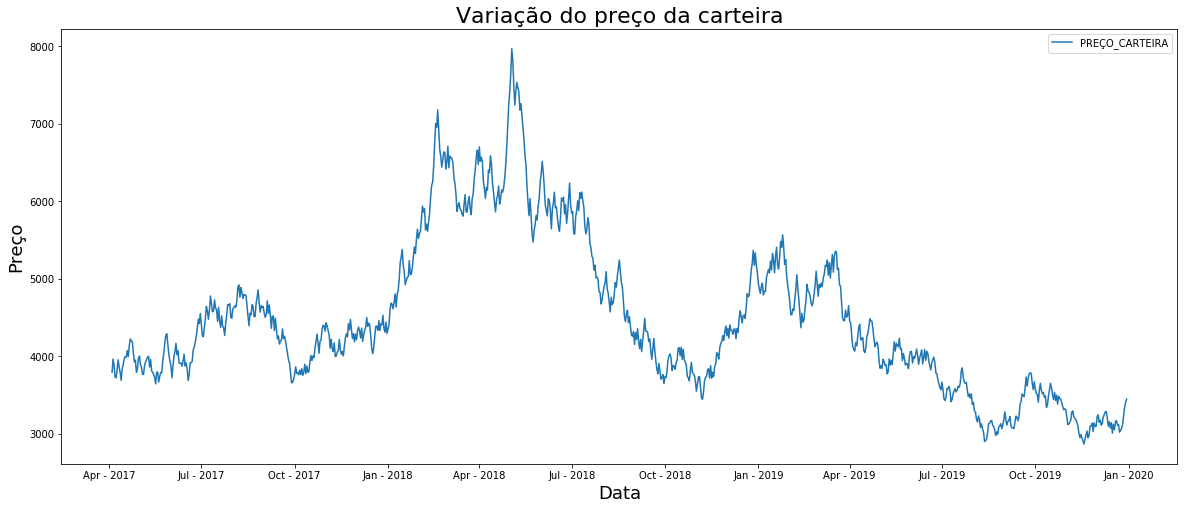

In [105]:
gera_grafico(portfolio_history['PREÇO_CARTEIRA'], 'Variação do preço da carteira')

# Ativos

### Ativo A

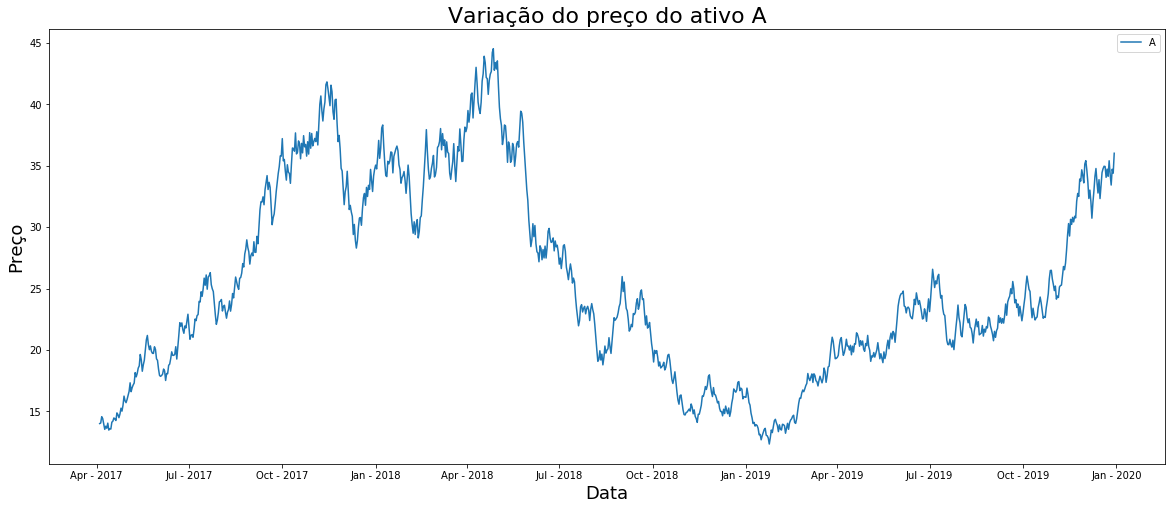

In [106]:
gera_grafico(asset_pricing['A'], 'Variação do preço do ativo A')

### Ativo B

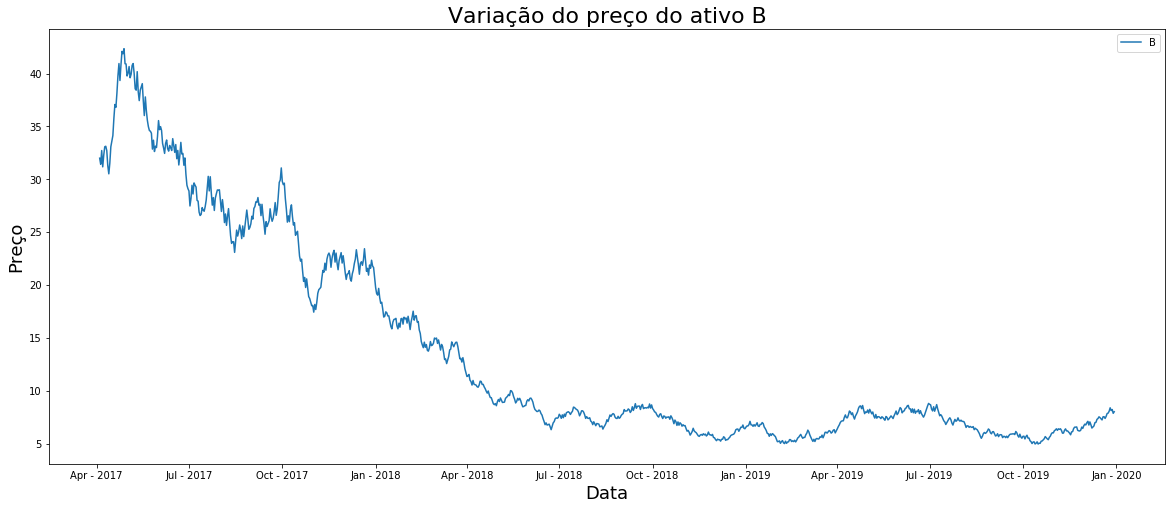

In [107]:
gera_grafico(asset_pricing['B'], 'Variação do preço do ativo B')

### Ativo C

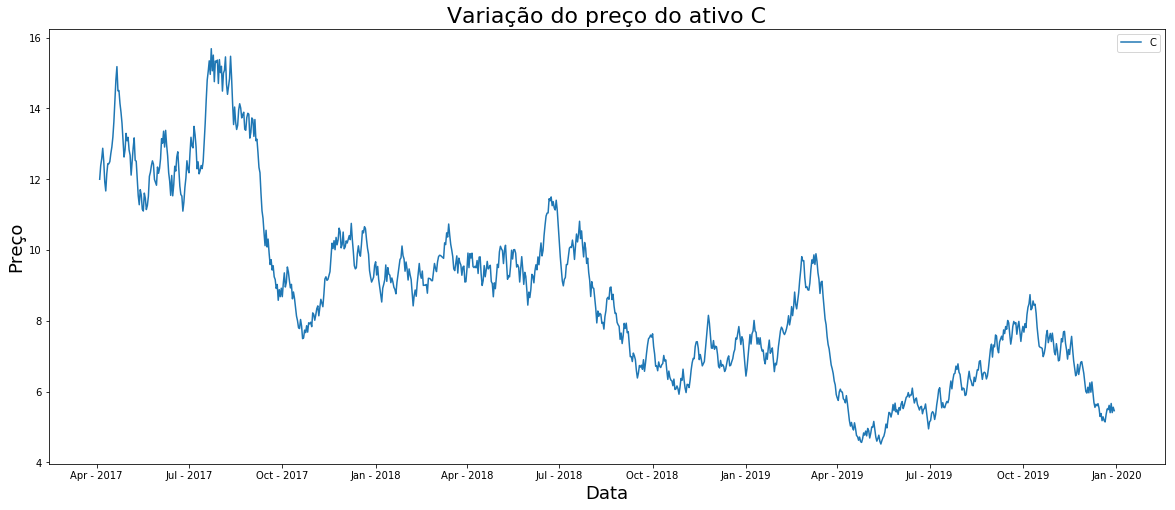

In [108]:
gera_grafico(asset_pricing['C'], 'Variação do preço do ativo C')

### Ativo D

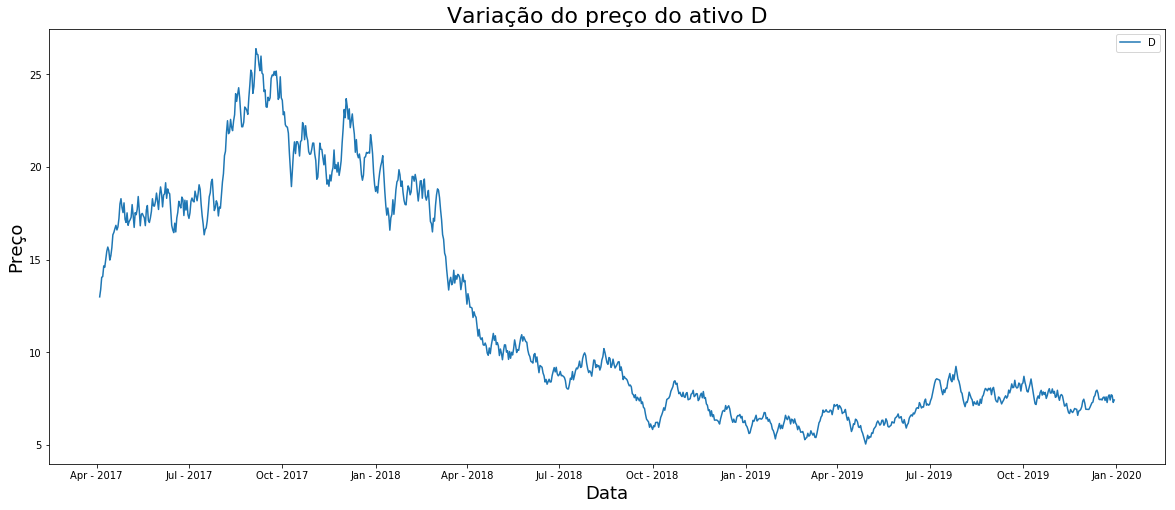

In [109]:
gera_grafico(asset_pricing['D'], 'Variação do preço do ativo D')

### Ativo E

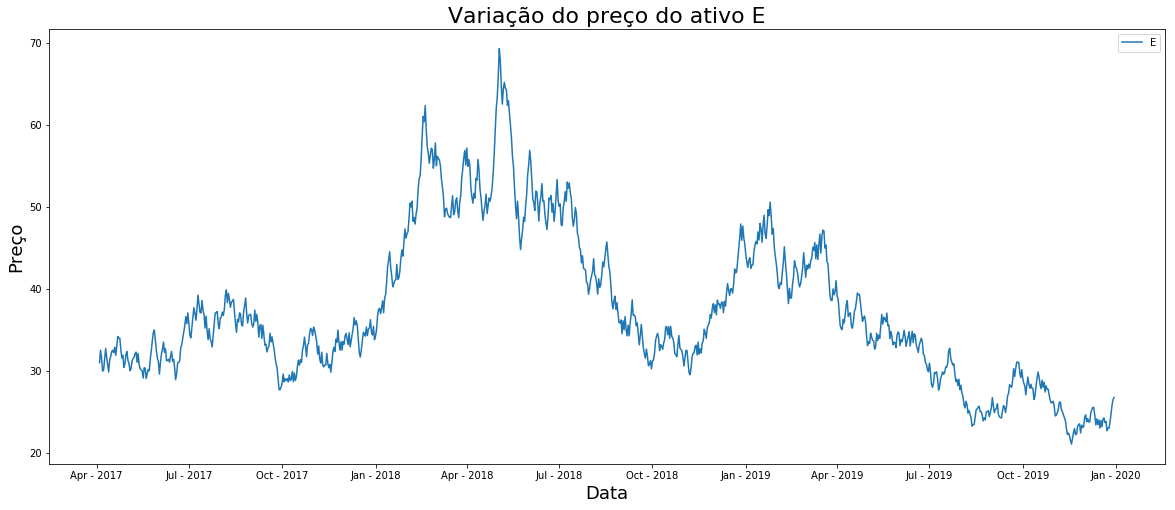

In [110]:
gera_grafico(asset_pricing['E'], 'Variação do preço do ativo E')

# Estratégia de compra e venda

In [111]:
# Loop por ativo para calcular suas respectivas médias móveis e momentos de compra e venda
for ativo in asset_prices['ativo']:
    
    # Criação dos valores de médias móveis
    asset_pricing[ativo + '_20MA'] = asset_pricing[ativo].rolling(window = 20).mean()
    asset_pricing[ativo + '_100MA'] = asset_pricing[ativo].rolling(window = 100).mean()
    asset_pricing[ativo + '_20MA_prev'] = asset_pricing[ativo + '_20MA'].shift(1)
    asset_pricing[ativo + '_100MA_prev'] = asset_pricing[ativo + '_100MA'].shift(1)
    
    
    
asset_pricing.tail()

,DATA,A,B,C,D,E,A_20MA,A_100MA,A_20MA_prev,A_100MA_prev,...,C_20MA_prev,C_100MA_prev,D_20MA,D_100MA,D_20MA_prev,D_100MA_prev,E_20MA,E_100MA,E_20MA_prev,E_100MA_prev
996,2019-12-26,34.29187,8.39559,5.40512,7.43486,23.75477,33.72616,28.09386,33.66264,27.99278,...,5.58120,7.02731,7.53990,7.59377,7.51961,7.59911,23.95853,25.80694,23.95833,25.84206
997,2019-12-27,33.43536,8.13509,5.66583,7.71739,24.82957,33.79355,28.18440,33.72616,28.09386,...,5.53897,7.00191,7.56767,7.59277,7.53990,7.59377,23.95740,25.77220,23.95853,25.80694
998,2019-12-28,34.72240,8.23594,5.40810,7.67961,25.84831,33.99302,28.28180,33.79355,28.18440,...,5.52304,6.98232,7.58747,7.58941,7.56767,7.59277,23.98760,25.74955,23.95740,25.77220
999,2019-12-29,34.40283,7.87494,5.56067,7.30471,26.49936,34.11289,28.38007,33.99302,28.28180,...,5.47975,6.96298,7.58663,7.57942,7.58747,7.58941,24.03600,25.73467,23.98760,25.74955
1000,2019-12-30,36.02470,8.02578,5.46167,7.43517,26.74920,34.26567,28.48456,34.11289,28.38007,...,5.45908,6.94329,7.57858,7.57280,7.58663,7.57942,24.09718,25.71352,24.03600,25.73467


### Ativo A

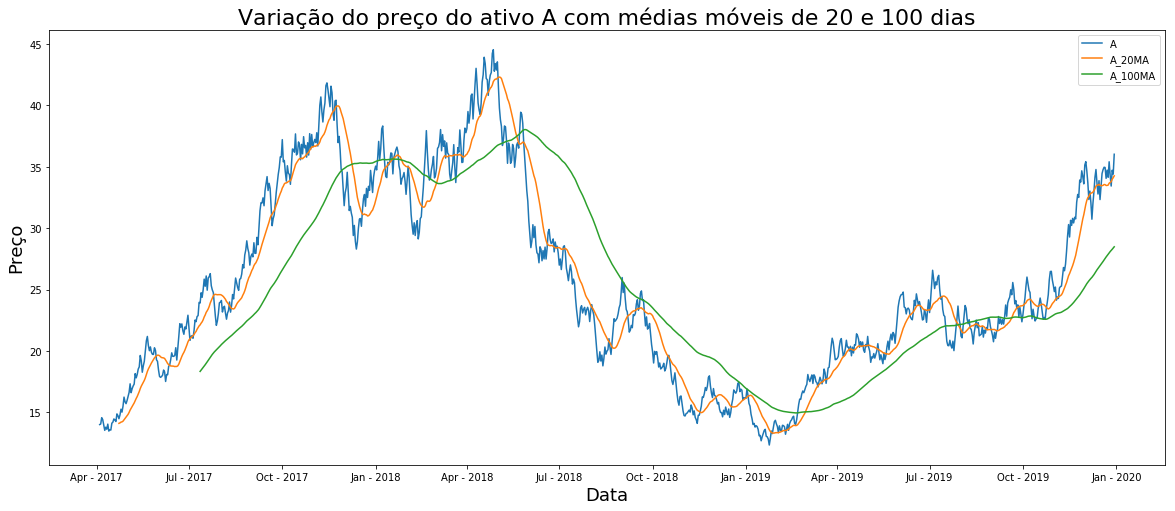

In [112]:
gera_grafico(asset_pricing['A'], 'Variação do preço do ativo A com médias móveis de 20 e 100 dias', 
             ma20 = asset_pricing['A_20MA'], ma100 = asset_pricing['A_100MA'])

### Ativo B

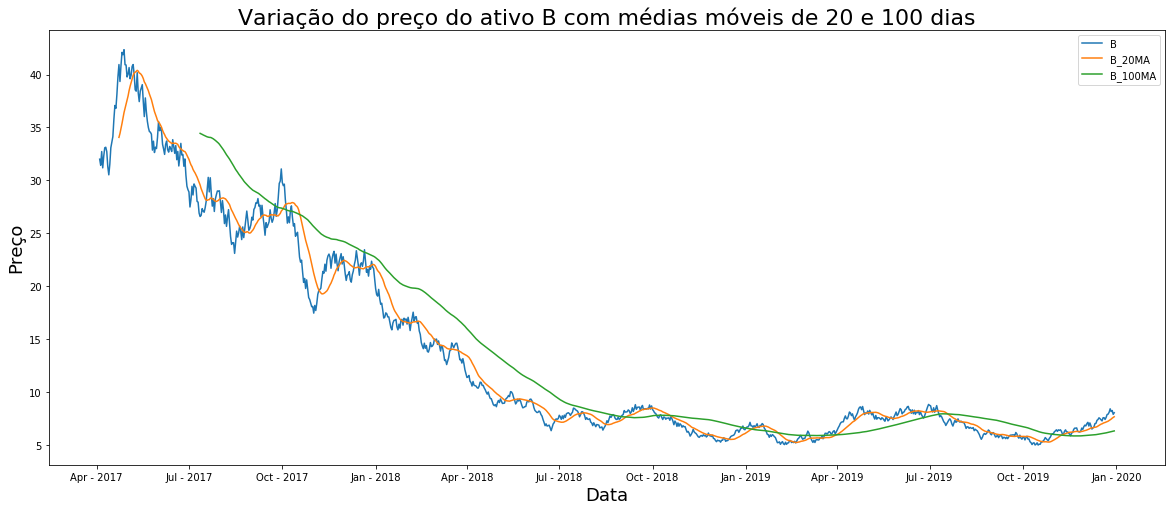

In [113]:
gera_grafico(asset_pricing['B'], 'Variação do preço do ativo B com médias móveis de 20 e 100 dias', 
             ma20 = asset_pricing['B_20MA'], ma100 = asset_pricing['B_100MA'])

### Ativo C

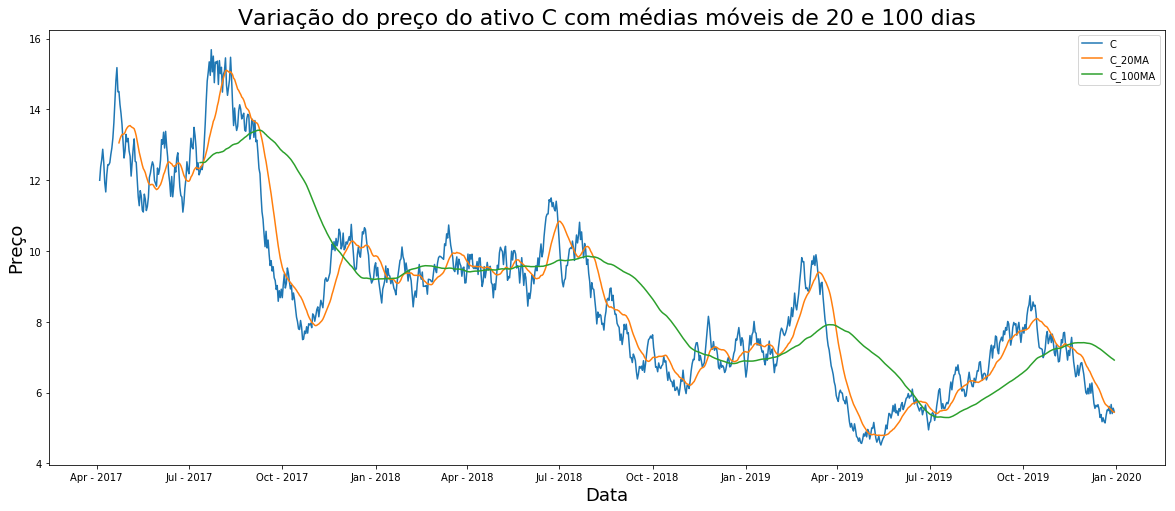

In [114]:
gera_grafico(asset_pricing['C'], 'Variação do preço do ativo C com médias móveis de 20 e 100 dias', 
             ma20 = asset_pricing['C_20MA'], ma100 = asset_pricing['C_100MA'])

### Ativo D

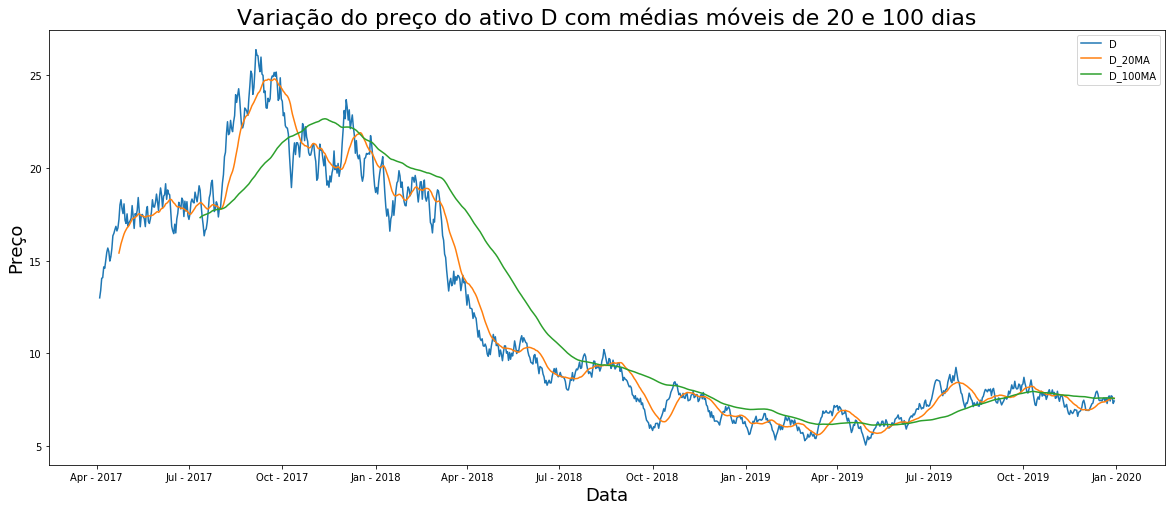

In [115]:
gera_grafico(asset_pricing['D'], 'Variação do preço do ativo D com médias móveis de 20 e 100 dias', 
             ma20 = asset_pricing['D_20MA'], ma100 = asset_pricing['D_100MA'])

### Ativo E

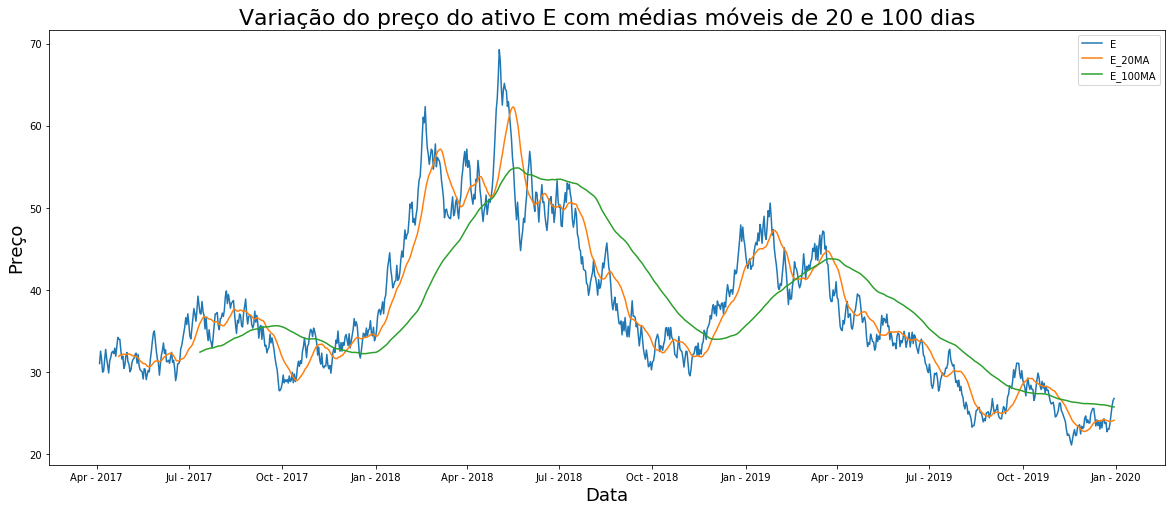

In [116]:
gera_grafico(asset_pricing['E'], 'Variação do preço do ativo E com médias móveis de 20 e 100 dias', 
             ma20 = asset_pricing['E_20MA'], ma100 = asset_pricing['E_100MA'])

## Momentos de compra e venda

In [117]:
# Criação dos momentos de compra e venda a partir das intersecções das médias móveis
buys = pd.DataFrame()
sells = pd.DataFrame()

for ativo in asset_prices['ativo']:
    temp_buys = asset_pricing.loc[(asset_pricing[ativo + '_20MA'] >= asset_pricing[ativo + '_100MA']) 
                        & (asset_pricing[ativo + '_20MA_prev'] <= asset_pricing[ativo + '_100MA_prev'])][['DATA', ativo]]
    temp_buys['ativo'] = ativo
    temp_buys = temp_buys.rename(columns={ativo: 'preco'})
    
    
    temp_sells = asset_pricing.loc[(asset_pricing[ativo + '_20MA'] <= asset_pricing[ativo + '_100MA']) 
                        & (asset_pricing[ativo + '_20MA_prev'] >= asset_pricing[ativo + '_100MA_prev'])][['DATA', ativo]]
    temp_sells['ativo'] = ativo
    temp_sells = temp_sells.rename(columns={ativo: 'preco'})
    
    
    buys = buys.append(pd.DataFrame(temp_buys))
    sells = sells.append(pd.DataFrame(temp_sells))

### Indicações de compra

In [118]:
buys

,DATA,preco,ativo
290,2018-01-19,35.77323,A
333,2018-03-03,36.49758,A
696,2019-03-01,17.09516,A
900,2019-09-21,25.57509,A
181,2017-10-02,29.50028,B
519,2018-09-05,8.09491,B
643,2019-01-07,6.77525,B
727,2019-04-01,6.40021,B
949,2019-11-09,5.99734,B
103,2017-07-16,13.01253,C


### Indicações de venda

In [119]:
sells

,DATA,preco,ativo
249,2017-12-09,30.89203,A
298,2018-01-27,34.03147,A
412,2018-05-21,36.97575,A
847,2019-07-30,22.62695,A
198,2017-10-19,22.25962,B
563,2018-10-19,7.63906,B
669,2019-02-02,5.21103,B
837,2019-07-20,7.33694,B
158,2017-09-09,12.18441,C
285,2018-01-14,9.32157,C


### Ativo A

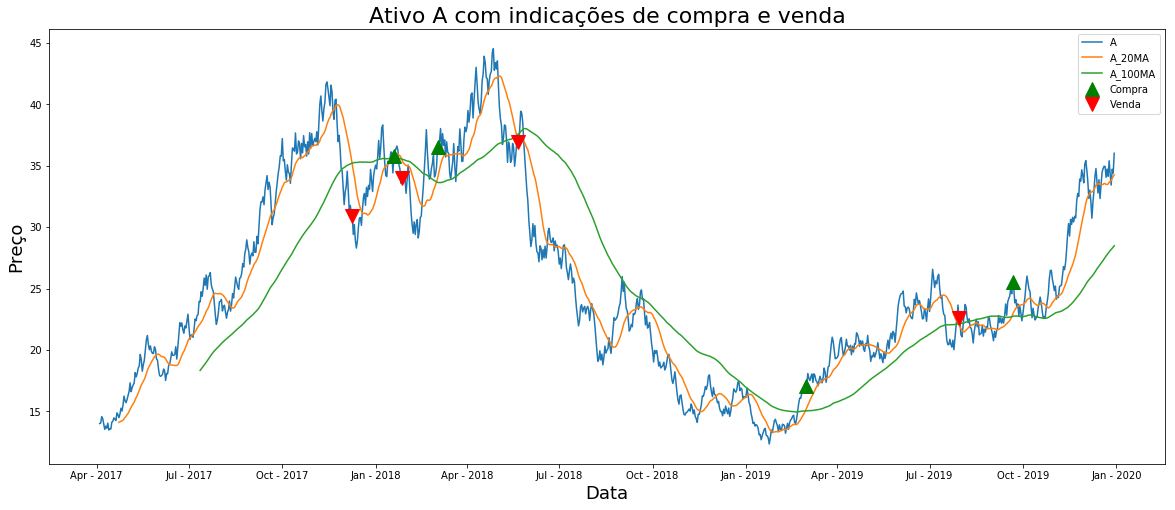

In [120]:
gera_grafico(asset_pricing['A'], "Ativo A com indicações de compra e venda", 
             ma20 = asset_pricing['A_20MA'], ma100 = asset_pricing['A_100MA'],
             buys = buys[buys['ativo'] == 'A'], sells = sells[sells['ativo'] == 'A'])

### Ativo B

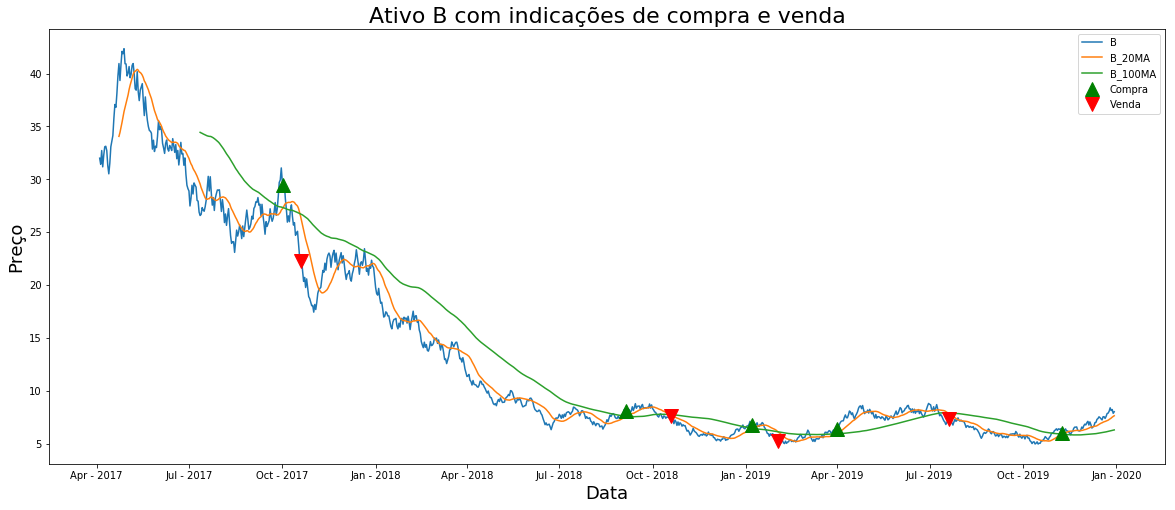

In [121]:
gera_grafico(asset_pricing['B'], "Ativo B com indicações de compra e venda", 
             ma20 = asset_pricing['B_20MA'], ma100 = asset_pricing['B_100MA'],
             buys = buys[buys['ativo'] == 'B'], sells = sells[sells['ativo'] == 'B'])

### Ativo C

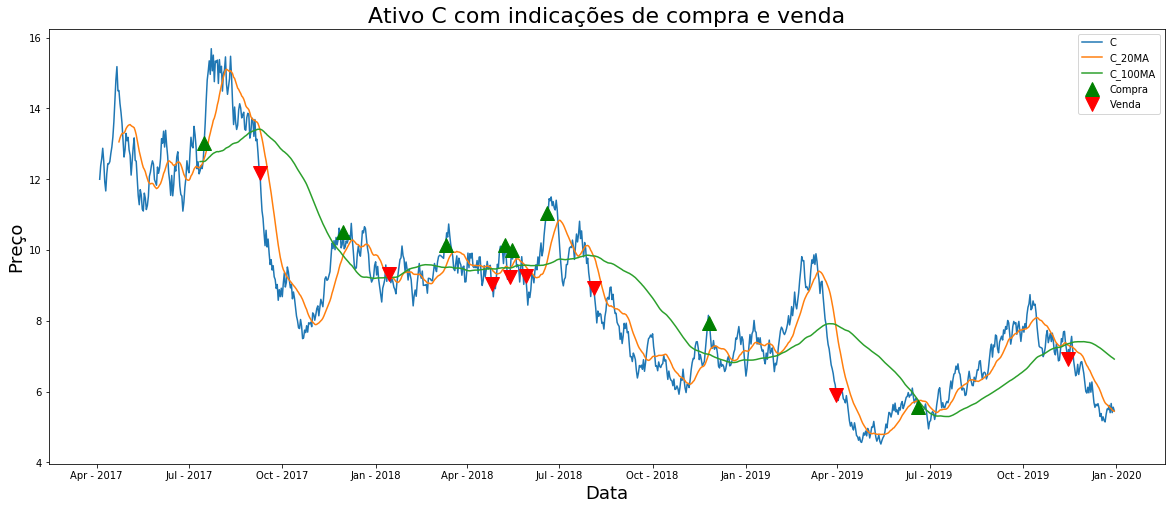

In [122]:
gera_grafico(asset_pricing['C'], "Ativo C com indicações de compra e venda", 
             ma20 = asset_pricing['C_20MA'], ma100 = asset_pricing['C_100MA'],
             buys = buys[buys['ativo'] == 'C'], sells = sells[sells['ativo'] == 'C'])

### Ativo D

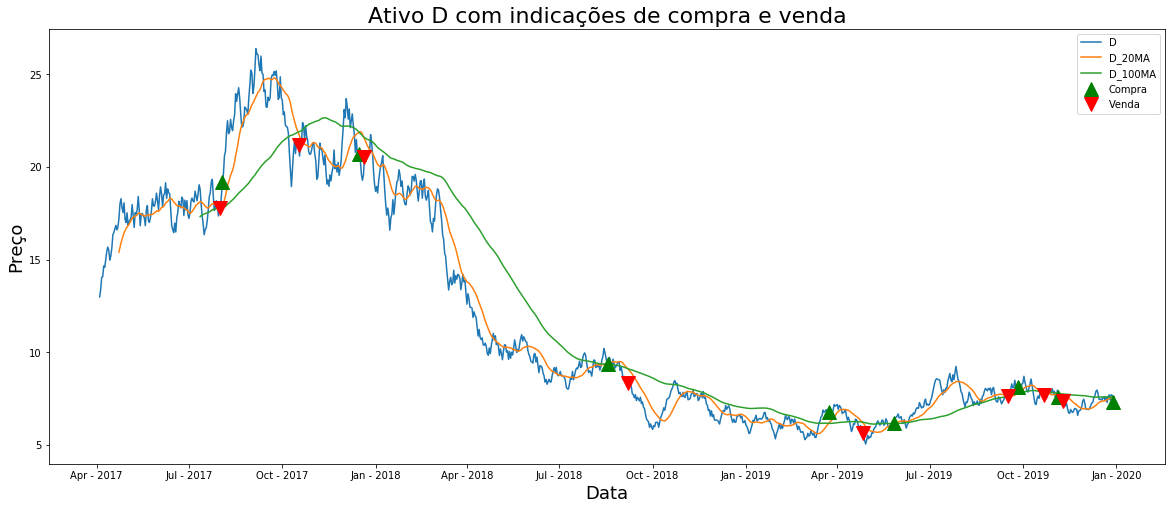

In [123]:
gera_grafico(asset_pricing['D'], "Ativo D com indicações de compra e venda", 
             ma20 = asset_pricing['D_20MA'], ma100 = asset_pricing['D_100MA'],
             buys = buys[buys['ativo'] == 'D'], sells = sells[sells['ativo'] == 'D'])

### Ativo E

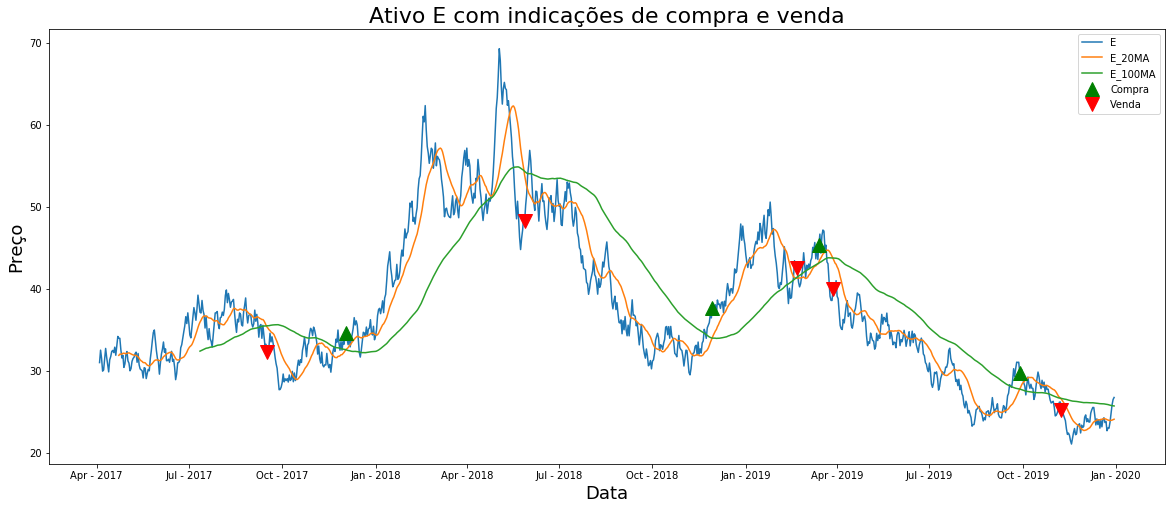

In [124]:
gera_grafico(asset_pricing['E'], "Ativo E com indicações de compra e venda", 
             ma20 = asset_pricing['E_20MA'], ma100 = asset_pricing['E_100MA'],
             buys = buys[buys['ativo'] == 'E'], sells = sells[sells['ativo'] == 'E'])

# Simulação da carteira

In [125]:
# Dataframe com todas as opreções que devem ser realizadas na carteira
operations = pd.DataFrame()

for ativo in portfolio['ativos']:
    
    temp_buys = pd.DataFrame(buys[buys['ativo'] == ativo])
    temp_buys['direcao'] = 'compra'
    
    temp_sells = pd.DataFrame(sells[sells['ativo'] == ativo])
    temp_sells['direcao'] = 'venda'
     
    operations = operations.append([temp_buys, temp_sells])

In [126]:
operations.sort_values(by='DATA')

,DATA,preco,ativo,direcao
103,2017-07-16,13.01253,C,compra
158,2017-09-09,12.18441,C,venda
165,2017-09-16,32.30907,E,venda
240,2017-11-30,10.50846,C,compra
243,2017-12-03,34.54902,E,compra
249,2017-12-09,30.89203,A,venda
285,2018-01-14,9.32157,C,venda
290,2018-01-19,35.77323,A,compra
298,2018-01-27,34.03147,A,venda
333,2018-03-03,36.49758,A,compra
